In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,319090387,1,美浩始,男,61465,https://www.zhihu.com/people/chen-zi-hao-18,学渣，ACG爱好者，历史爱好者,1310437618,2020-06-30 10:03:03,233,1115,156,现在中国LGBTQ群体所面临的的问题，根源在于“世界变化的太快了”以及互联网的普及。LGBT...
1,319090387,1,波萨达斯星人,未知,48618,https://www.zhihu.com/people/wa-xi-li-liang-za...,东亚人,1313215811,2020-07-01 13:47:06,39,521,97,我觉得非常不乐观。无论是日式女权—LGBT运动的发展，还是这个问题下的很多答案，都反映出了一...
2,319090387,1,持续低熵,未知,359370,https://www.zhihu.com/people/chang-shou-92,五百年的因，五千年的果。最后的斗争，最初的承诺。,1312139751,2020-07-01 04:02:48,433,1834,306,中国没有强大的宗教保守势力，本来LGBT的前景是不错的，只需要等90后及更晚的一代人掌握权力...
3,319090387,1,Parker Sept,男,855,https://www.zhihu.com/people/tan-ren-rui-sept,少数派无报告,1310591134,2020-06-30 15:03:52,54,397,56,腻乎有的人就是闭门造车得可以，建议不要一面靠比烂说什么“我这已经很开明了”，一面说着把LGB...
4,319090387,1,Mr.To,未知,182,https://www.zhihu.com/people/mr-to,NaN,1238440177,2020-05-22 06:08:29,58,194,31,有些人真就偷换概念，以不可能所有人都承认同一价值观直接推出LGBT不被承认是具有普适性，...


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (502, 13)
Shape of DataFrame after removing duplicates: (502, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,319090387,1,美浩始,男,61465,https://www.zhihu.com/people/chen-zi-hao-18,学渣，ACG爱好者，历史爱好者,1310437618,2020-06-30 10:03:03,233,1115,156,现在中国lgbtq群体所面临的的问题，根源在于“世界变化的太快了”以及互联网的普及。lgbt...
1,319090387,1,波萨达斯星人,未知,48618,https://www.zhihu.com/people/wa-xi-li-liang-za...,东亚人,1313215811,2020-07-01 13:47:06,39,521,97,我觉得非常不乐观。无论是日式女权—lgbt运动的发展，还是这个问题下的很多答案，都反映出了一...
2,319090387,1,持续低熵,未知,359370,https://www.zhihu.com/people/chang-shou-92,五百年的因，五千年的果。最后的斗争，最初的承诺。,1312139751,2020-07-01 04:02:48,433,1834,306,中国没有强大的宗教保守势力，本来lgbt的前景是不错的，只需要等90后及更晚的一代人掌握权力...
3,319090387,1,Parker Sept,男,855,https://www.zhihu.com/people/tan-ren-rui-sept,少数派无报告,1310591134,2020-06-30 15:03:52,54,397,56,腻乎有的人就是闭门造车得可以，建议不要一面靠比烂说什么“我这已经很开明了”，一面说着把lgb...
4,319090387,1,Mr.To,未知,182,https://www.zhihu.com/people/mr-to,NaN,1238440177,2020-05-22 06:08:29,58,194,31,有些人真就偷换概念，以不可能所有人都承认同一价值观直接推出lgbt不被承认是具有普适性，...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一个", "一来", "一样", "一般", "一转眼",
    "万一", "两", "两个", "俩", "上", "上下", "下", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？"
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.603 seconds.
Prefix dict has been built successfully.


0    [现在, 中国, lgbtq, 群体, 面临, 问题, 根源, 世界, 变化, 太快, 互联...
1    [觉得, 非常, 不, 乐观, 无论是, 日式, 女权, lgbt, 运动, 发展, 问题,...
2    [中国, 没有, 强大, 宗教, 保守势力, 本来, lgbt, 前景, 不错, 需要, 9...
3    [腻乎, 闭门造车, 建议, 不要, 一面, 比烂, 说, 已经, 开明, 一面, 说, l...
4    [人真, 偷换概念, 不, 可能, 所有人, 承认, 同一, 价值观, 直接, 推出, lg...
Name: tokenized_content, dtype: object


In [5]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


In [6]:
import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from torch.nn.functional import softmax
import time

# Set random seed for reproducibility
seed = 59

torch.manual_seed(seed)
np.random.seed(seed)

# Load the pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path  # Make sure 'file_path' is defined somewhere in your code
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using RoBERTa
def roberta_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['回答内容'].apply(roberta_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 4.560291798909505 minutes
一共用时:4.560291798909505分钟
                                   tokenized_content  \
0  ['现在', '中国', 'lgbtq', '群体', '面临', '问题', '根源', ...   
1  ['觉得', '非常', '不', '乐观', '无论是', '日式', '女权', 'lg...   
2  ['中国', '没有', '强大', '宗教', '保守势力', '本来', 'lgbt',...   
3  ['腻乎', '闭门造车', '建议', '不要', '一面', '比烂', '说', '已...   
4  ['人真', '偷换概念', '不', '可能', '所有人', '承认', '同一', '...   

                                     sentiment_probs sentiment_label  
0  [0.32897061109542847, 0.33619579672813416, 0.3...        Negative  
1  [0.3292849659919739, 0.33480218052864075, 0.33...         Neutral  
2  [0.3292046785354614, 0.3363581895828247, 0.334...        Negative  
3  [0.330567330121994, 0.33479613065719604, 0.334...        Negative  
4  [0.3288635313510895, 0.336043119430542, 0.3350...        Negative  


In [7]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,鸡,麻,黄,黑,默,鼓,鼻,齐,龄,龙
0,3636,1032,515,2,1,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,5331,1510,754,4,1,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1550,436,217,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1522,426,212,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,636,178,88,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,10,100,20,30,b,g,gay,lgbt,lgbtlgbt,lgbtq,...,饭,骂,骄傲,骗婚,骚扰,高,黑人,默认,默许,鼓励
0,0,0,0,0,0,0,0,7,0,6,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,13,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,7,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


    10  100        20   30    b    g  gay      lgbt  lgbtlgbt     lgbtq  ...  \
0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.106288       0.0  0.158508  ...   
1  0.0  0.0  0.032058  0.0  0.0  0.0  0.0  0.141853       0.0  0.000000  ...   
2  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.361360       0.0  0.000000  ...   
3  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.024853       0.0  0.302685  ...   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.070005       0.0  0.121800  ...   

          饭         骂   骄傲   骗婚   骚扰    高        黑人   默认   默许   鼓励  
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  
1  0.000000  0.032058  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  
2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  
3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  
4  0.217191  0.000000  0.0  0.0  0.0  0.0  0.192924  0.0  0.0  0.0  

[5 rows x 1390 columns]


In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0     11.389098               0
1     10.938525               1
2      8.007212               2
3      7.792179               3
4      5.439058               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index                 Top Terms
0     11.389098               0     [民众, 群体, 欧美, 互联网, 中国]
1     10.938525               1     [党, 日本, 这种, 自由主义, 成功]
2      8.007212               2    [西方, lgbt, 人士, 不行, 中国]
3      7.792179               3  [异性恋, 团体, lgbtq, 开明, 责任]
4      5.439058               4         [承认, 老, 饭, 强, 告诉]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT_dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT_tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


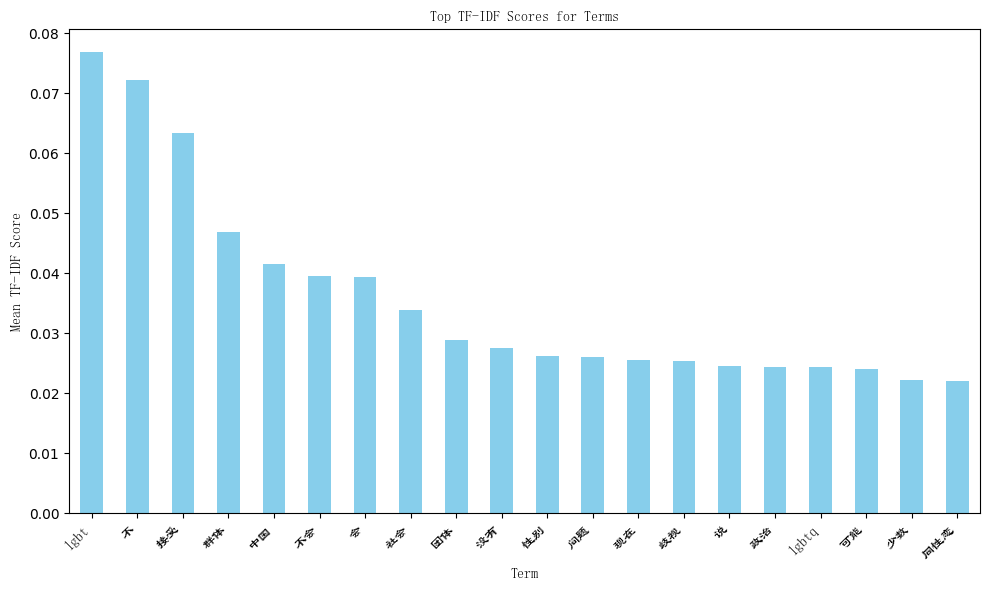

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path =  r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Fonts\SIMLI.TTF'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

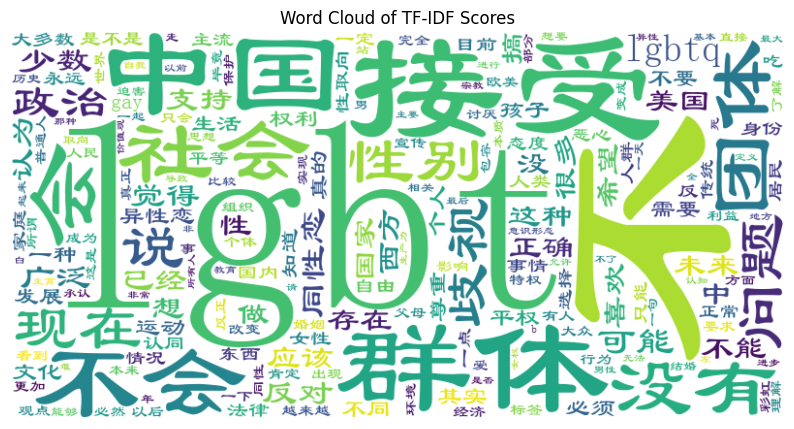

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (500, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


In [17]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [18]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [19]:
from pyLDAvis import save_html

output_directory = r'C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory)
print("Visualized content has been saved to: ", output_directory)


Visualized content has been saved to:  C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT_lda_visualization.html


In [20]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory)


True

In [21]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


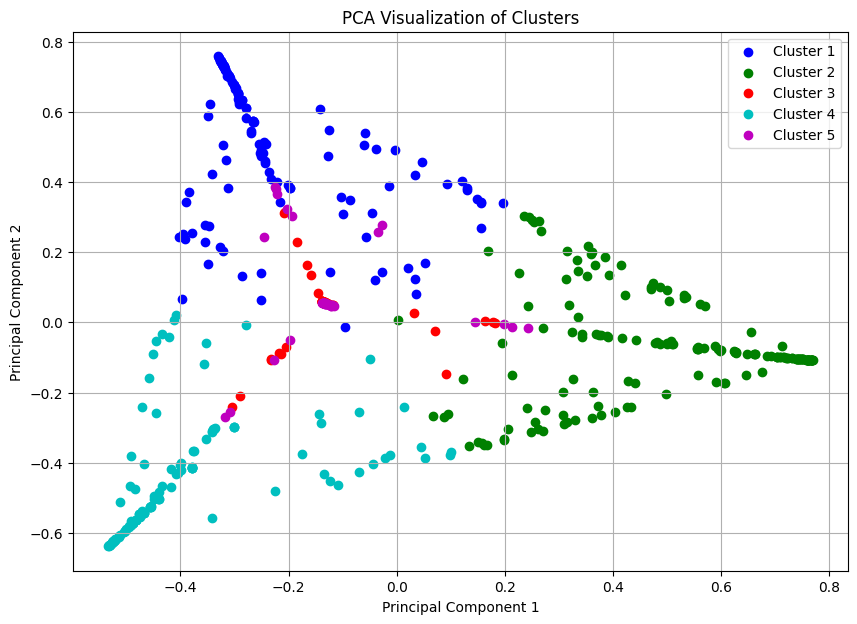

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 5  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


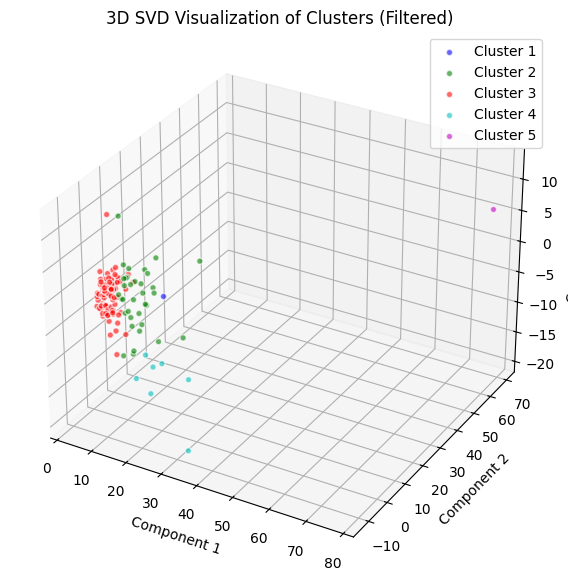

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import zscore

def plot_clusters_3d(dtm, lda_model, num_clusters, threshold):
    # Get dominant topic probabilities for each document
    dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

    # Perform K-means clustering based on dominant topic probabilities
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(dtm)

    # Reduce dimensionality using TruncatedSVD
    svd = TruncatedSVD(n_components=3, random_state=42)  # Reduce to 3 dimensions for visualization
    svd_result = svd.fit_transform(dtm)

    # Calculate Z-scores for the SVD components
    z_scores = np.abs(zscore(svd_result))

    # Filter out points with any Z-score above the threshold
    filtered_indices = np.where((z_scores < threshold).all(axis=1))[0]
    filtered_svd_result = svd_result[filtered_indices]
    filtered_clusters = clusters[filtered_indices]

    # Plot the clusters in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for each cluster
    colors = ['b', 'g', 'r', 'c', 'm']

    for cluster_label, color in zip(range(num_clusters), colors):
        cluster_indices = np.where(filtered_clusters == cluster_label)[0]
        ax.scatter(filtered_svd_result[cluster_indices, 0], filtered_svd_result[cluster_indices, 1], filtered_svd_result[cluster_indices, 2], c=color, label=f'Cluster {cluster_label + 1}', alpha=0.6, edgecolors='w')

    ax.set_title('3D SVD Visualization of Clusters (Filtered)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()
    plt.show()

# Call the function for each cell
plot_clusters_3d(dtm, lda_model, 10, 100)


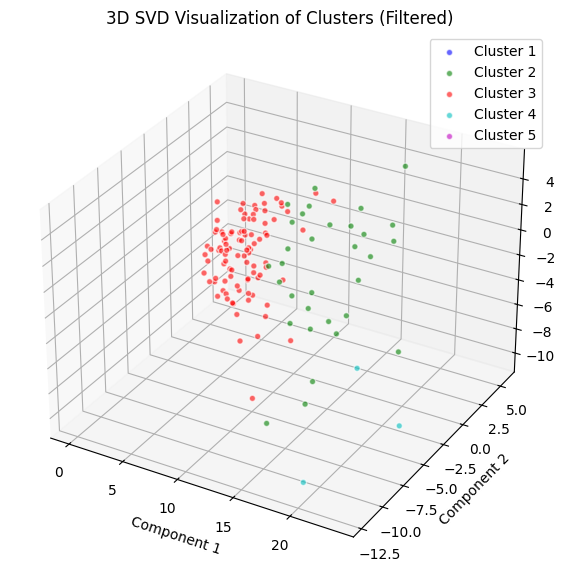

In [24]:
plot_clusters_3d(dtm, lda_model, 10, 3)

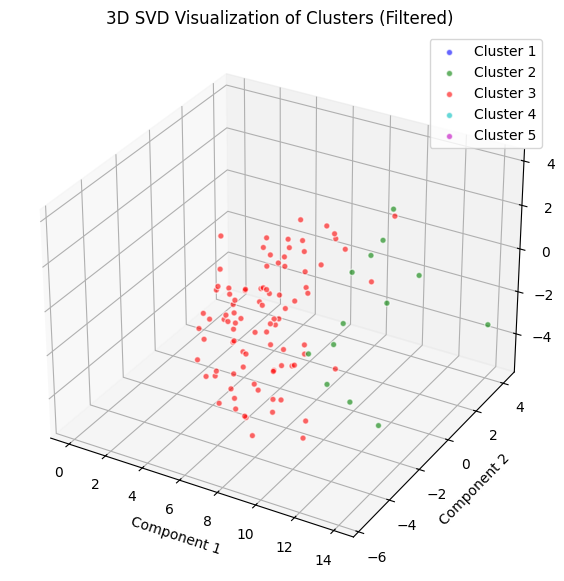

In [25]:
plot_clusters_3d(dtm, lda_model, 10, 1.5)

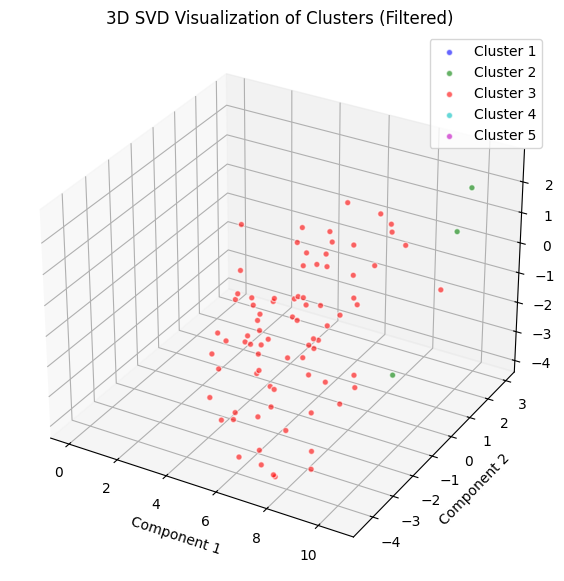

In [26]:
plot_clusters_3d(dtm, lda_model, 10, 1)

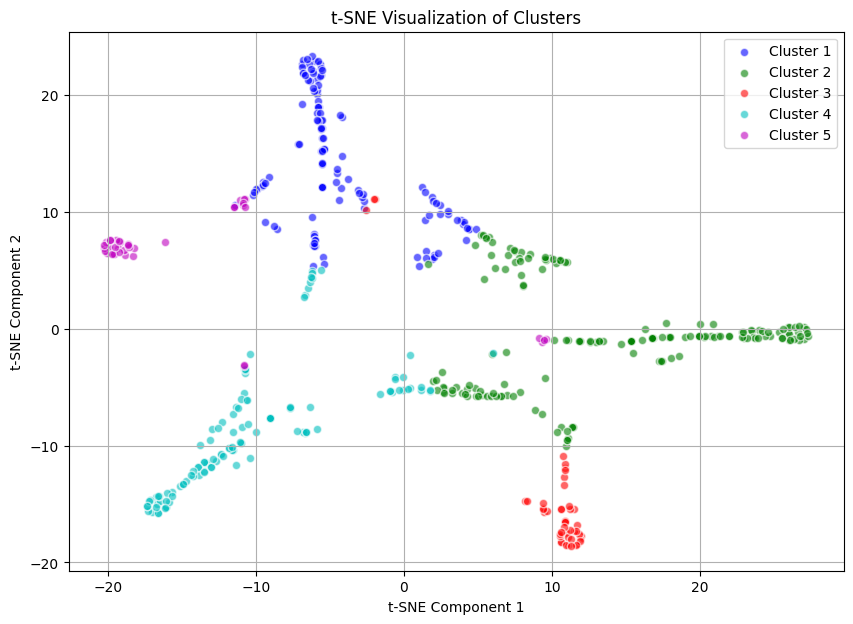

In [27]:
from sklearn.manifold import TSNE

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(lda_output)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(tsne_result[cluster_indices, 0], tsne_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}', alpha=0.6, edgecolors='w')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


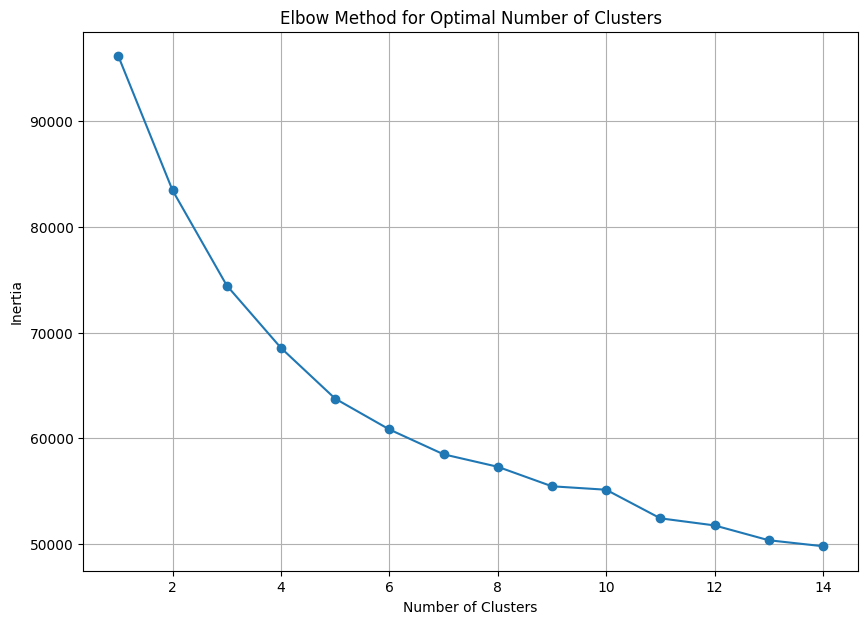

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different numbers of clusters
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtm)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [30]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


In [31]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 不 性别 接受 鼓励 lgbt 歧视 同性恋 团体 反对 觉得
Cluster 2 Most Frequent Words: lgbt 群体 政治 少数 社会 不 性别 中国 正确 lgbtq
Cluster 3 Most Frequent Words: 接受 鼓励 环境 传统 结婚 父母 必须 女人 不 没
Cluster 4 Most Frequent Words: 接受 不 中国 lgbtq 不会 lgbt 鼓励 团体 多 多元
Cluster 5 Most Frequent Words: lgbt 美国 彩虹 大众 鼓励 身份 左 白 大 我国

Ten Top Terms for Each Cluster
Cluster 1 top terms: 接受 性别 lgbt 没有 同性恋 不会 群体 歧视 觉得 很多
Cluster 2 top terms: lgbt 群体 社会 接受 中国 少数 问题 没有 政治 这种
Cluster 3 top terms: 接受 lgbt 群体 没有 社会 不会 这种 喜欢 家庭 问题
Cluster 4 top terms: lgbt 接受 中国 同性恋 团体 问题 不会 没有 社会 孩子
Cluster 5 top terms: lgbt 中国 美国 彩虹 身份 同性恋 文化 社会 群体 接受


In [32]:
# Now you can group the narratives by their assigned thematic clusters
grouped_clusters = df.groupby('cluster_label')

# Iterate over each thematic cluster and access the narratives within each cluster
for cluster_label, group_df in grouped_clusters:
    print(f"Cluster {cluster_label + 1}:")
    print(group_df['tokenized_content'].head())  # Here we pass the already tokenized text instead of the original content
    print()


Cluster 1:
6     ['不', '知道', '搞', '阅读', '理解', '纠结', '题目', '劲', ...
10    ['不', '要求', '所有人', '接受', '没有', '国家', '做到', '所有...
12    ['答案', '不会', '观念', '接受', '不', '可能', '看看', '答案'...
27    ['利益', '相关', '利益', '相关', '政策', '是否', '覆盖', '决定...
30    ['全', '中国', '不太可能', '希望', '尽量', '做到', '不', '认同...
Name: tokenized_content, dtype: object

Cluster 2:
0    ['现在', '中国', 'lgbtq', '群体', '面临', '问题', '根源', ...
1    ['觉得', '非常', '不', '乐观', '无论是', '日式', '女权', 'lg...
2    ['中国', '没有', '强大', '宗教', '保守势力', '本来', 'lgbt',...
4    ['人真', '偷换概念', '不', '可能', '所有人', '承认', '同一', '...
7    ['问题', '下面', '回答', '不够', '明显', '实际', '情况', '难如...
Name: tokenized_content, dtype: object

Cluster 3:
5     ['希望', '说', '不能', '直接', '一点', '说', '当下', '绝大多数...
8     ['先说', '结论', '不要', '说', '团体', '说', '群体', 'lgbt...
16    ['不', '知道', '个人', '倒', '滋磁', '争取', '同性', '婚姻',...
18    ['这群人', '特殊', '留心', '一下', '不难', '分辨', '女', '同性...
21    ['这是', '官方', '态度', '普通', '民众', '态度', 'lgbt', '...
Name: tokenized_content, dtype: object

Cluster 4:
3

In [33]:
# Initialize an empty dictionary to store the sentiment distribution for each cluster
sentiment_distribution = {}

# Iterate over each cluster
for cluster, group_df in grouped_clusters:
    # Count the occurrences of each sentiment label in the current cluster
    label_counts = group_df['sentiment_label'].value_counts()
    
    # Calculate the total number of narratives in the current cluster
    total_narratives = label_counts.sum()
    
    # Calculate the proportion of each sentiment label and store it in the sentiment distribution dictionary
    sentiment_distribution[cluster] = {
        'Positive': label_counts.get('Positive', 0) / total_narratives,
        'Negative': label_counts.get('Negative', 0) / total_narratives,
        'Neutral': label_counts.get('Neutral', 0) / total_narratives
    }

# Print the sentiment distribution for each cluster
for cluster, distribution in sentiment_distribution.items():
    print(f"Cluster {cluster + 1}:")
    for sentiment, proportion in distribution.items():
        print(f"   {sentiment}: {proportion:.2%}")
    print()


Cluster 1:
   Positive: 12.70%
   Negative: 68.25%
   Neutral: 19.05%

Cluster 2:
   Positive: 4.73%
   Negative: 63.91%
   Neutral: 31.36%

Cluster 3:
   Positive: 6.52%
   Negative: 65.22%
   Neutral: 28.26%

Cluster 4:
   Positive: 9.17%
   Negative: 66.67%
   Neutral: 24.17%

Cluster 5:
   Positive: 10.26%
   Negative: 66.67%
   Neutral: 23.08%



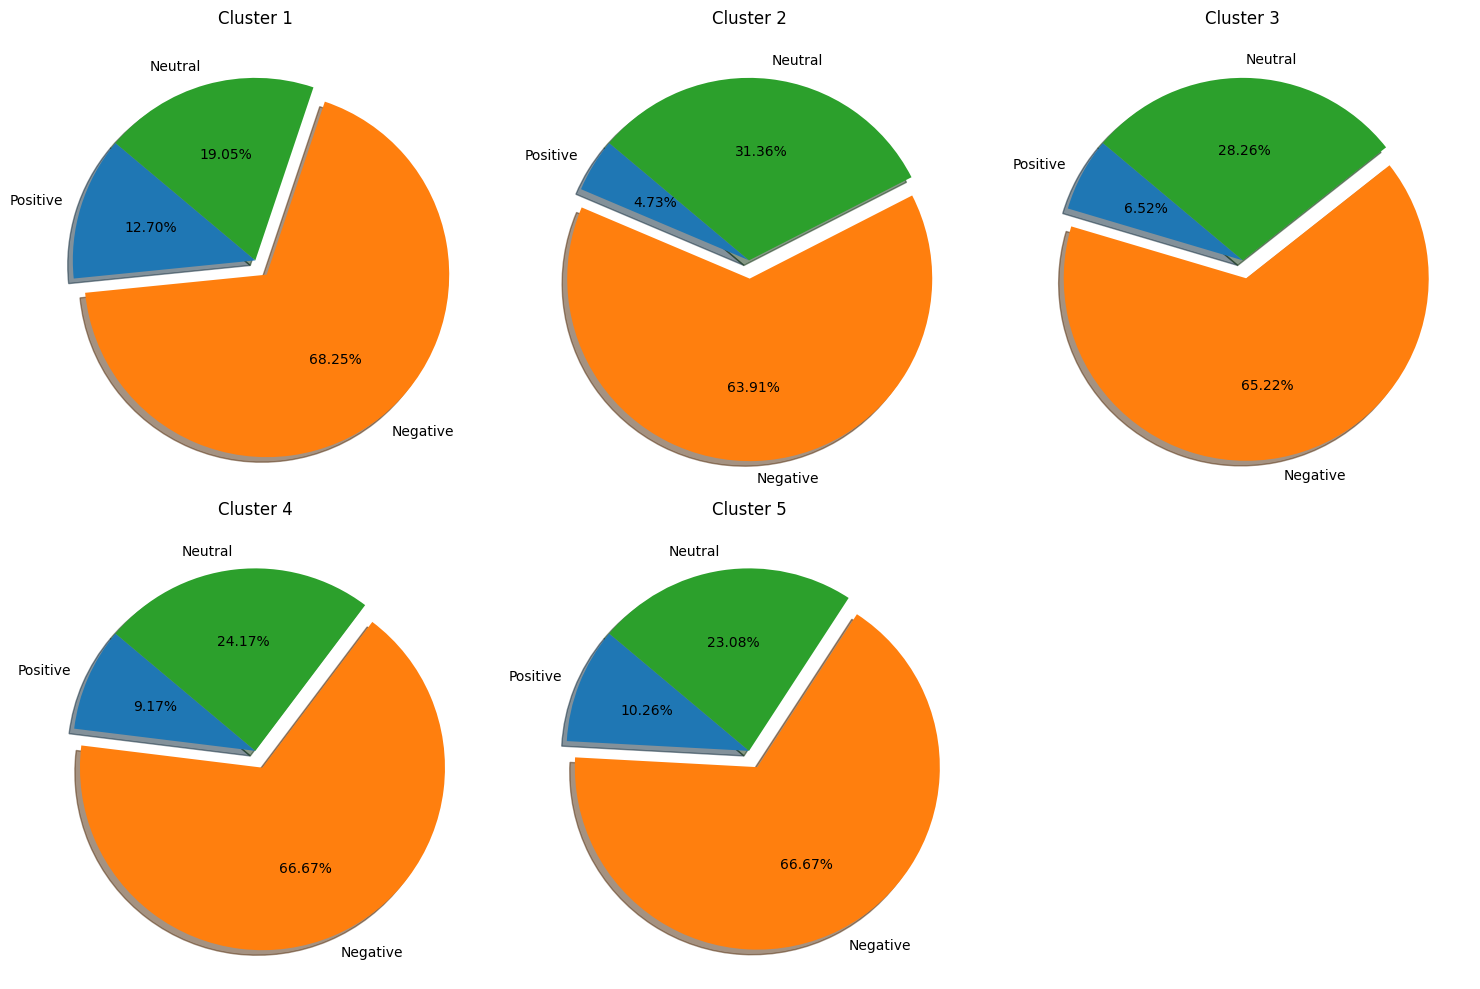

In [34]:
import matplotlib.pyplot as plt

# Plotting pie charts for each cluster
plt.figure(figsize=(15, 10))
for i, (cluster, distribution) in enumerate(sentiment_distribution.items(), 1):
    labels = distribution.keys()
    sizes = distribution.values()
    explode = (0, 0.1, 0)  # explode the 'Negative' slice
    plt.subplot(2, 3, i)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=140)
    plt.title(f"Cluster {cluster + 1}")

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import spacy

# Load the Chinese NER model from spaCy
nlp = spacy.load("zh_core_web_sm")

# Load the CSV file
file_path = file_path
df = pd.read_csv(file_path)

# Define a function to perform Named Entity Recognition (NER) on text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the '回答内容' column and create a new column for named entities
df['named_entities'] = df['回答内容'].apply(perform_ner)

# Display the dataframe with named entities
print(df[['回答内容', 'named_entities']].head())

# Save the named_entities to original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with NER has been saved to the original file:", file_path)


                                                回答内容  \
0  现在中国lgbtq群体所面临的的问题，根源在于“世界变化的太快了”以及互联网的普及。lgbt...   
1  我觉得非常不乐观。无论是日式女权—lgbt运动的发展，还是这个问题下的很多答案，都反映出了一...   
2  中国没有强大的宗教保守势力，本来lgbt的前景是不错的，只需要等90后及更晚的一代人掌握权力...   
3  腻乎有的人就是闭门造车得可以，建议不要一面靠比烂说什么“我这已经很开明了”，一面说着把lgb...   
4    有些人真就偷换概念，以不可能所有人都承认同一价值观直接推出lgbt不被承认是具有普适性，...   

                                      named_entities  
0  [(中国, GPE), (两, CARDINAL), (中国, GPE), (中国, GPE...  
1  [(日式, GPE), (八千, CARDINAL), (张牙舞爪, PERSON), (沙...  
2  [(中国, GPE), (中国, GPE), (美国, GPE), (苏联, GPE), (...  
3        [(一, CARDINAL), (lan, PERSON), (几个月, DATE)]  
4  [(普适性, PERSON), (一, CARDINAL), (两, CARDINAL), ...  
DataFrame with NER has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


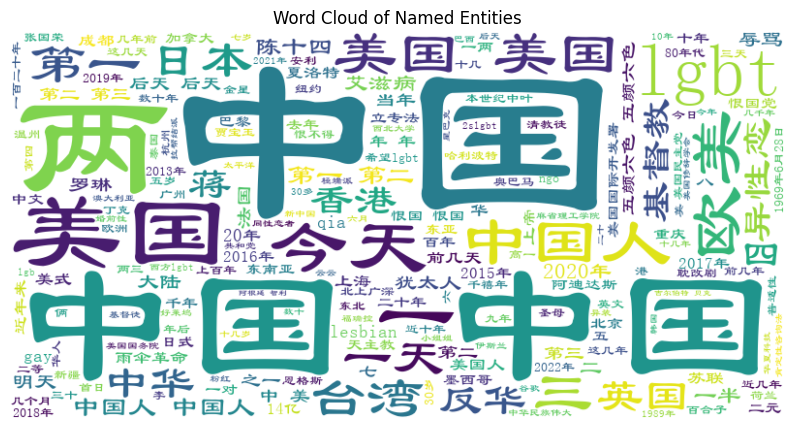

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of named entities
all_named_entities = [ent[0] for ents in df['named_entities'] for ent in ents]

# Join all named entities into a single string
all_named_entities_text = ' '.join(all_named_entities)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_named_entities_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Named Entities')
plt.axis('off')
plt.show()


In [37]:
from collections import Counter

# Function to extract named entities of a specific type from the dataframe
def extract_entities_by_type(entity_type):
    all_entities = [entity[0] for entities_list in df['named_entities'] for entity in entities_list if entity[1] == entity_type]
    return all_entities

# List of entity types
entity_types = ['GPE', 'ORG', 'NORP', 'PERSON', 'WORK_OF_ART', 'FAC', 'LOC', 'PRODUCT', 'EVENT', 'LANGUAGE', 'LAW', 'TIME', 'PERCENT', 'QUANTITY', 'ORDINAL', 'MISC']

# Iterate over each entity type and print the top 10 most frequent entities
for entity_type in entity_types:
    entities = extract_entities_by_type(entity_type)
    entity_counter = Counter(entities)
    top_entities = entity_counter.most_common(10)
    print(f"Top 10 {entity_type}:")
    for entity, count in top_entities:
        print(entity, count)
    print()


Top 10 GPE:
中国 274
美国 104
台湾 17
日本 15
英国 11
香港 10
反华 10
美 7
大陆 6
罗琳 6

Top 10 ORG:
基督教 7
辱骂 4
美国国际开发署 3
立专法 3
美国民主党 2
耽改剧 2
中华民族伟大 2
肯定性咨询法 2
lgb 2
共和党 2

Top 10 NORP:
中国 48
中国人 41
中华 7
犹太人 6
美国人 4
美式 4
美国 4
清教徒 2
基督教 2
天主教 2

Top 10 PERSON:
lgbt 25
蒋 10
陈十四 8
异性恋 6
qia 4
上帝 4
夏洛特 4
恨国党 3
阿迪达斯 3
gay 3

Top 10 WORK_OF_ART:
哈利波特 2
怎么在中国 1
蓝宇 1
癸辛杂识 1
阅微草堂笔记 1
红楼梦 1
小城出来的gay 1
甄嬛传 1
闽中风雅赖 1
浮生六记 1

Top 10 FAC:
龙阳教 1
台北酒店 1
西交实验室 1
东正教 1
天安门 1
骄傲月 1
朝圣者教堂 1
西史辨伪 1

Top 10 LOC:
欧美 25
东亚 3
东南亚 3
东北 2
欧洲 2
太平洋 2
婚前性 2
东京都 1
北新 1
中东 1

Top 10 PRODUCT:
龙阳党 1
word 1

Top 10 EVENT:
艾滋病 7
雨伞革命 4
科大事件 1
wimpund 1
两会 1
1969年纽约市 1
美国pride 1
世界杯 1
半性恋 1

Top 10 LANGUAGE:
中文 3
英文 2
汉语 1
普适性 1

Top 10 LAW:
神奇动物 1

Top 10 TIME:
六夜 1
24小时 1
今晚 1
160小时 1
半夜 1
欧美晚 1
一夜 1
后天早上 1

Top 10 PERCENT:
1. 3
百合子 2
80% 1
80％ 1
百花齐放 1
百合番 1
百分之五十 1
百官黎庶 1
百元不等 1
百害无一利 1

Top 10 QUANTITY:
3级 1
十公分 1
40多公分 1

Top 10 ORDINAL:
第一 26
第二 19
第三 10
第四 2
第④部 1
第②部 1
高二 1
第三方 1
第十 1

Top 10 MISC:



In [38]:
import pandas as pd
import re

# Define aspect-related terms and corresponding regular expressions based on the most frequent words and top terms from clusters
aspect_patterns = {
    'cultural_and_social_attitudes': r'(文化|社会|态度|观念|传统|价值观|道德|伦理|信仰)',
    'legal_and_judicial_system': r'(法律|司法|司法|体系|法治|公正|透明|程序|改革|法律|程序)',
    'crime_deterrence_and_public_safety': r'(犯罪|防止犯罪|公共安全|安全|刑事政策|刑事体系|治安)',
    'human_rights_and_ethics': r'(人权|道德|伦理|生命权|禁止|酷刑|死刑|人道|公平|公义|冤假错案|冤案|冤枉)',
    'international_comparisons': r'(国际|国外|外国|其他国家|国家|横向对比)',
    'political_and_policy_factors': r'(政治|政策|政府|公众|公共|意识形态|立场|政府政策|立法|改革)',
    'victim_rights_and_justice': r'(受害人权利|受害人|受害者|受害者权益|司法公正|公正|司法权利|公平|正义)',
    # Add more aspect patterns based on the identified aspects and their associated terms
}


# Define a function to perform rule-based aspect identification
def identify_aspects(text):
    aspects = []
    for aspect, pattern in aspect_patterns.items():
        matches = re.findall(pattern, text)
        if matches:
            aspects.append(aspect)  # Append the aspect category instead of the matched keyword
    if not aspects:
        aspects.append('others')  # Append 'others' if no aspect matches
    return aspects

# Apply rule-based aspect identification to the '回答内容' column
df['aspect_candidates'] = df['回答内容'].apply(identify_aspects)

# Display the dataframe with identified aspect categories
print(df[['回答内容', 'aspect_candidates']].head())

# Save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with Rule-Based Aspect Identification has been saved to the original file:", file_path)


                                                回答内容  \
0  现在中国lgbtq群体所面临的的问题，根源在于“世界变化的太快了”以及互联网的普及。lgbt...   
1  我觉得非常不乐观。无论是日式女权—lgbt运动的发展，还是这个问题下的很多答案，都反映出了一...   
2  中国没有强大的宗教保守势力，本来lgbt的前景是不错的，只需要等90后及更晚的一代人掌握权力...   
3  腻乎有的人就是闭门造车得可以，建议不要一面靠比烂说什么“我这已经很开明了”，一面说着把lgb...   
4    有些人真就偷换概念，以不可能所有人都承认同一价值观直接推出lgbt不被承认是具有普适性，...   

                                   aspect_candidates  
0  [cultural_and_social_attitudes, legal_and_judi...  
1  [cultural_and_social_attitudes, legal_and_judi...  
2  [cultural_and_social_attitudes, human_rights_a...  
3  [cultural_and_social_attitudes, legal_and_judi...  
4  [cultural_and_social_attitudes, international_...  
DataFrame with Rule-Based Aspect Identification has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Spectrum\Topics\LGBT\CSV\Public\LGBT.csv


In [39]:
from collections import Counter

# Count the frequency of each aspect category
aspect_counts = Counter([item for sublist in df['aspect_candidates'] for item in sublist])

# Store the counts of each aspect category into variables
cultural_count = aspect_counts.get('cultural_and_social_attitudes', 0)
legal_count = aspect_counts.get('legal_and_judicial_system', 0)
crime_count = aspect_counts.get('crime_deterrence_and_public_safety', 0)
human_right_count = aspect_counts.get('human_rights_and_ethics', 0)
international_count = aspect_counts.get('international_comparisons', 0)
political_policy_count = aspect_counts.get('political_and_policy_factors', 0)
victim_right_count = aspect_counts.get('victim_rights_and_justice', 0)
others_count = aspect_counts.get('others', 0)

# Display the counts
print("Cultural and Social Attitudes Count:", cultural_count)
print("Legal and Judicial System Count:", legal_count)
print("Crime Deterrence and Public Safety Count:", crime_count)
print("Human Rights and Ethics Count:", human_right_count)
print("International Comparisons Count:", international_count)
print("Political and Policy Factors Count:", political_policy_count)
print("Victim Rights and Justice Count:", victim_right_count)
print("Others Count:", others_count)


Cultural and Social Attitudes Count: 213
Legal and Judicial System Count: 58
Crime Deterrence and Public Safety Count: 17
Human Rights and Ethics Count: 55
International Comparisons Count: 105
Political and Policy Factors Count: 136
Victim Rights and Justice Count: 18
Others Count: 207


C:\Users\jesse\anaconda3\Lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap()


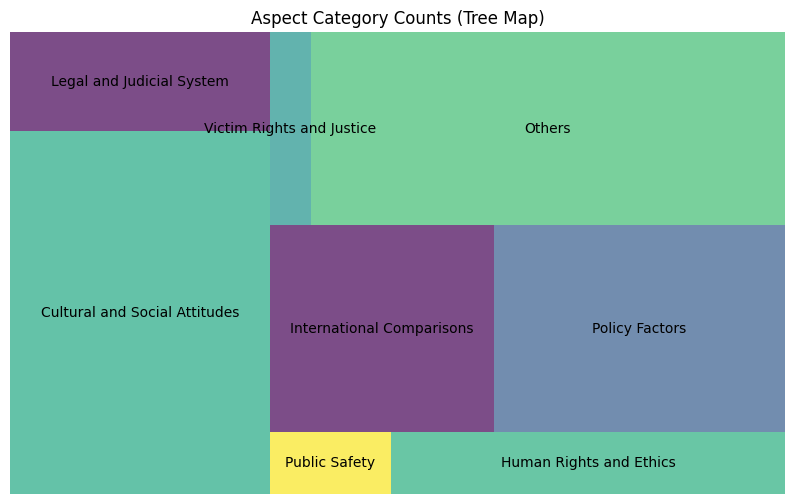

In [40]:
import matplotlib.pyplot as plt
import squarify

# Create a dictionary to store aspect category counts
aspect_counts_dict = {
    'Cultural and Social Attitudes': cultural_count,
    'Legal and Judicial System': legal_count,
    'Public Safety': crime_count,
    'Human Rights and Ethics': human_right_count,
    'International Comparisons': international_count,
    'Policy Factors': political_policy_count,
    'Victim Rights and Justice': victim_right_count,
    'Others': others_count
}

# Plotting the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=aspect_counts_dict.values(), label=aspect_counts_dict.keys(), alpha=0.7)
plt.axis('off')
plt.title('Aspect Category Counts (Tree Map)')
plt.show()


In [41]:
# Filter rows containing 'cultural_and_social_attitudes' in the aspect_candidates column
cultural_rows = df[df['aspect_candidates'].apply(lambda x: 'cultural_and_social_attitudes' in x)]

# Calculate sentiment distribution for 'cultural_and_social_attitudes'
cultural_sentiments = cultural_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
cultural_sentiments = cultural_sentiments.round(2)

# Print sentiment distribution for 'cultural_and_social_attitudes'
print("Sentiment distribution for 'Cultural and Social Attitudes':")
print("Positive:", cultural_sentiments.get('Positive', 0), "%")
print("Negative:", cultural_sentiments.get('Negative', 0), "%")
print("Neutral:", cultural_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'legal_and_judicial_system' in the aspect_candidates column
legal_rows = df[df['aspect_candidates'].apply(lambda x: 'legal_and_judicial_system' in x)]

# Calculate sentiment distribution for 'legal_and_judicial_system'
legal_sentiments = legal_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
legal_sentiments = legal_sentiments.round(2)

# Print sentiment distribution for 'legal_and_judicial_system'
print("Sentiment distribution for 'Legal and Judicial System':")
print("Positive:", legal_sentiments.get('Positive', 0), "%")
print("Negative:", legal_sentiments.get('Negative', 0), "%")
print("Neutral:", legal_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'crime_deterrence_and_public_safety' in the aspect_candidates column
crime_rows = df[df['aspect_candidates'].apply(lambda x: 'crime_deterrence_and_public_safety' in x)]

# Calculate sentiment distribution for 'crime_deterrence_and_public_safety'
crime_sentiments = crime_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
crime_sentiments = crime_sentiments.round(2)

# Print sentiment distribution for 'crime_deterrence_and_public_safety'
print("Sentiment distribution for 'Crime Deterrence and Public Safety':")
print("Positive:", crime_sentiments.get('Positive', 0), "%")
print("Negative:", crime_sentiments.get('Negative', 0), "%")
print("Neutral:", crime_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'human_rights_and_ethics' in the aspect_candidates column
human_rights_rows = df[df['aspect_candidates'].apply(lambda x: 'human_rights_and_ethics' in x)]

# Calculate sentiment distribution for 'human_rights_and_ethics'
human_rights_sentiments = human_rights_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
human_rights_sentiments = human_rights_sentiments.round(2)

# Print sentiment distribution for 'human_rights_and_ethics'
print("Sentiment distribution for 'Human Rights and Ethics':")
print("Positive:", human_rights_sentiments.get('Positive', 0), "%")
print("Negative:", human_rights_sentiments.get('Negative', 0), "%")
print("Neutral:", human_rights_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'international_comparisons' in the aspect_candidates column
international_rows = df[df['aspect_candidates'].apply(lambda x: 'international_comparisons' in x)]

# Calculate sentiment distribution for 'international_comparisons'
international_sentiments = international_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
international_sentiments = international_sentiments.round(2)

# Print sentiment distribution for 'international_comparisons'
print("Sentiment distribution for 'International Comparisons':")
print("Positive:", international_sentiments.get('Positive', 0), "%")
print("Negative:", international_sentiments.get('Negative', 0), "%")
print("Neutral:", international_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'political_and_policy_factors' in the aspect_candidates column
political_policy_rows = df[df['aspect_candidates'].apply(lambda x: 'political_and_policy_factors' in x)]

# Calculate sentiment distribution for 'political_and_policy_factors'
political_policy_sentiments = political_policy_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
political_policy_sentiments = political_policy_sentiments.round(2)

# Print sentiment distribution for 'political_and_policy_factors'
print("Sentiment distribution for 'Political and Policy Factors':")
print("Positive:", political_policy_sentiments.get('Positive', 0), "%")
print("Negative:", political_policy_sentiments.get('Negative', 0), "%")
print("Neutral:", political_policy_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'victim_rights_and_justice' in the aspect_candidates column
victim_rights_rows = df[df['aspect_candidates'].apply(lambda x: 'victim_rights_and_justice' in x)]

# Calculate sentiment distribution for 'victim_rights_and_justice'
victim_rights_sentiments = victim_rights_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
victim_rights_sentiments = victim_rights_sentiments.round(2)

# Print sentiment distribution for 'victim_rights_and_justice'
print("Sentiment distribution for 'Victim Rights and Justice':")
print("Positive:", victim_rights_sentiments.get('Positive', 0), "%")
print("Negative:", victim_rights_sentiments.get('Negative', 0), "%")
print("Neutral:", victim_rights_sentiments.get('Neutral', 0), "%")
print()


# Filter rows containing 'others' in the aspect_candidates column
others_rows = df[df['aspect_candidates'].apply(lambda x: 'others' in x)]

# Calculate sentiment distribution for 'others'
others_sentiments = others_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
others_sentiments = others_sentiments.round(2)

# Print sentiment distribution for 'others'
print("Sentiment distribution for 'Others':")
print("Positive:", others_sentiments.get('Positive', 0), "%")
print("Negative:", others_sentiments.get('Negative', 0), "%")
print("Neutral:", others_sentiments.get('Neutral', 0), "%")
print()


Sentiment distribution for 'Cultural and Social Attitudes':
Positive: 0.47 %
Negative: 65.26 %
Neutral: 34.27 %

Sentiment distribution for 'Legal and Judicial System':
Positive: 0 %
Negative: 60.34 %
Neutral: 39.66 %

Sentiment distribution for 'Crime Deterrence and Public Safety':
Positive: 0 %
Negative: 52.94 %
Neutral: 47.06 %

Sentiment distribution for 'Human Rights and Ethics':
Positive: 0 %
Negative: 54.55 %
Neutral: 45.45 %

Sentiment distribution for 'International Comparisons':
Positive: 0.95 %
Negative: 61.9 %
Neutral: 37.14 %

Sentiment distribution for 'Political and Policy Factors':
Positive: 1.47 %
Negative: 64.71 %
Neutral: 33.82 %

Sentiment distribution for 'Victim Rights and Justice':
Positive: 0 %
Negative: 33.33 %
Neutral: 66.67 %

Sentiment distribution for 'Others':
Positive: 18.36 %
Negative: 63.77 %
Neutral: 17.87 %



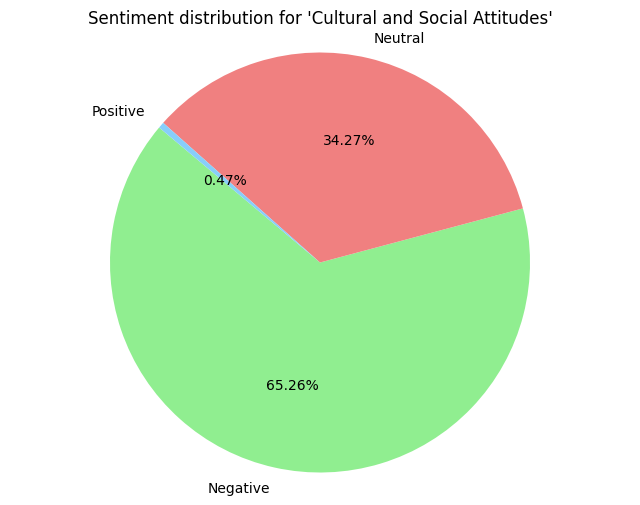

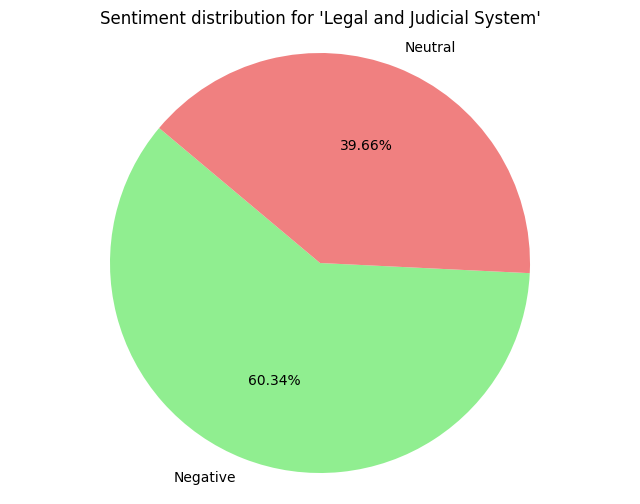

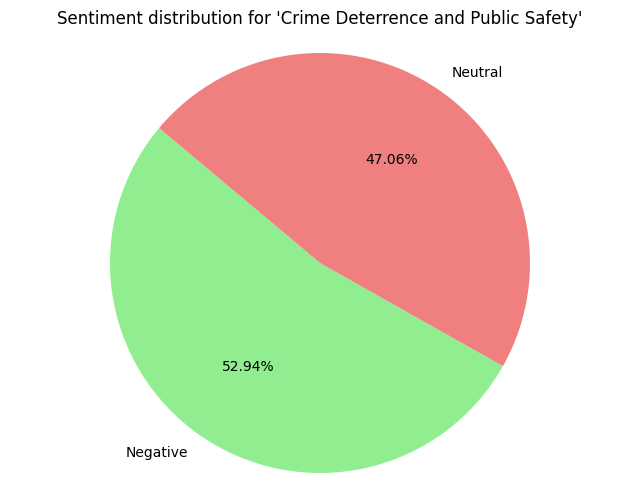

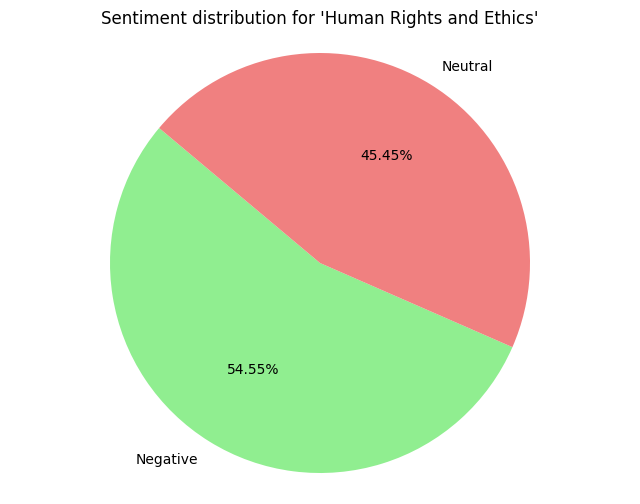

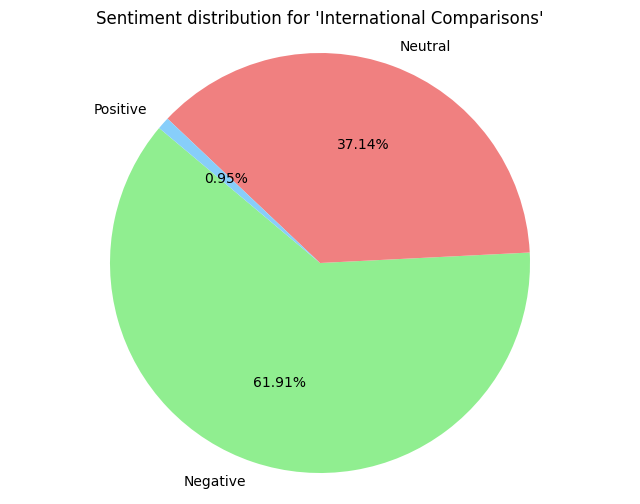

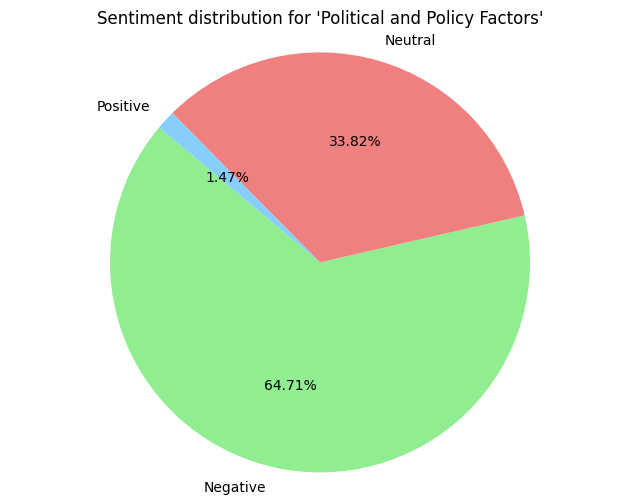

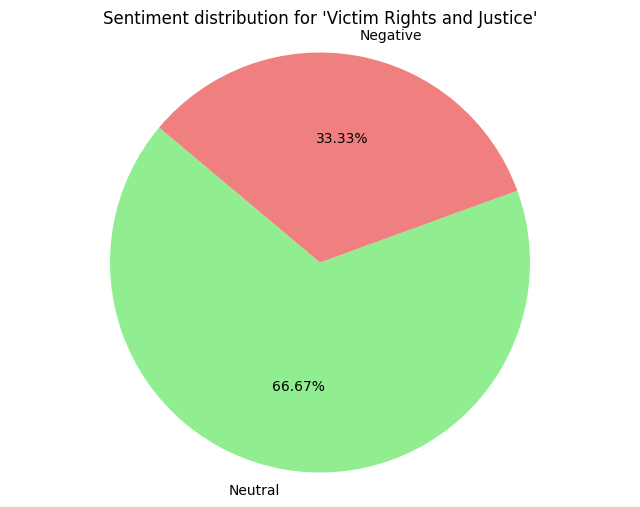

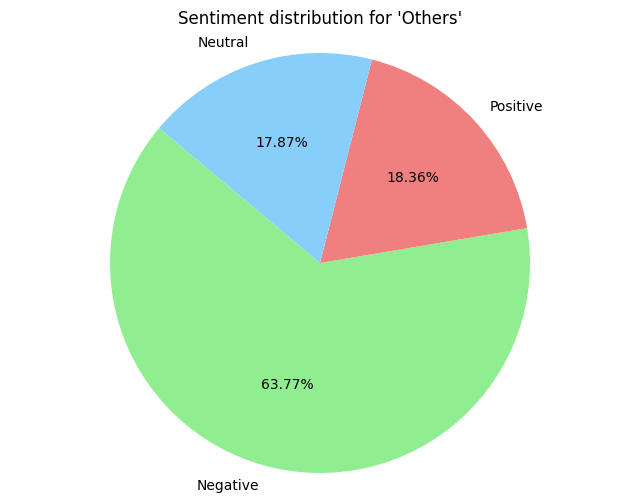

In [42]:
import matplotlib.pyplot as plt

# Define a function to create a pie chart for sentiment distribution
def plot_pie_chart(sentiments, aspect_name):
    labels = sentiments.index
    sizes = sentiments.values
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Sentiment distribution for '{aspect_name}'")
    plt.show()

# Plot pie chart for 'cultural_and_social_attitudes'
plot_pie_chart(cultural_sentiments, 'Cultural and Social Attitudes')

# Plot pie chart for 'legal_and_judicial_system'
plot_pie_chart(legal_sentiments, 'Legal and Judicial System')

# Plot pie chart for 'crime_deterrence_and_public_safety'
plot_pie_chart(crime_sentiments, 'Crime Deterrence and Public Safety')

# Plot pie chart for 'human_rights_and_ethics'
plot_pie_chart(human_rights_sentiments, 'Human Rights and Ethics')

# Plot pie chart for 'international_comparisons'
plot_pie_chart(international_sentiments, 'International Comparisons')

# Plot pie chart for 'political_and_policy_factors'
plot_pie_chart(political_policy_sentiments, 'Political and Policy Factors')

# Plot pie chart for 'victim_rights_and_justice'
plot_pie_chart(victim_rights_sentiments, 'Victim Rights and Justice')

# Plot pie chart for 'others'
plot_pie_chart(others_sentiments, 'Others')


In [42]:
import pandas as pd
import gc

def get_dataframes_in_memory():
    """
    Get the names and number of DataFrames currently in memory.
    """
    dataframes = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    return dataframes

# Print the names and number of DataFrames currently in memory
dataframes_in_memory = get_dataframes_in_memory()
num_dataframes = len(dataframes_in_memory)
print(f"Number of DataFrames in memory: {num_dataframes}")

if num_dataframes > 0:
    print("Names of DataFrames in memory:")
    for name, _ in dataframes_in_memory:
        print(name)


Number of DataFrames in memory: 22
Names of DataFrames in memory:
__
___
df
_1
duplicate_rows
_3
dtm_df
_8
_9
tfidf_df
document_tfidf_df
topic_prob_df
cluster_data
group_df
cultural_rows
legal_rows
crime_rows
human_rights_rows
international_rows
political_policy_rows
victim_rights_rows
others_rows
